# Import necessary libraries

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
import re

# Read datasets

Take notes:

"Emotion column": That column show the name of each emotion in every row

"Sentence" column: Every row in this column contains a sentence called "comments" in Facebook

In [10]:
train_df = pd.read_excel("./model_data/train_nor_811.xlsx")
val_df = pd.read_excel("./model_data/valid_nor_811.xlsx")
test_df = pd.read_excel("./model_data/test_nor_811.xlsx")

# View all datasets

In [11]:
train_df

,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...,...
5543,1332,Disgust,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544,825,Other,nhìn mặt héo queo luôn
5545,165,Other,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546,363,Enjoyment,thích thân hình boss rồi nhan 😌


In [12]:
val_df

,Unnamed: 0,Emotion,Sentence
0,941,Other,"tính tao tao biết , chẳng có chuyện gì có thể ..."
1,142,Enjoyment,"lại là lào cai , tự hào quê mình quá :))"
2,1164,Sadness,bị từ chối rồi
3,182,Enjoyment,tam đảo trời đẹp các mem à
4,868,Other,đọc bình luận của thằng đó không thiếu chữ nào 😂😂
...,...,...,...
681,1290,Sadness,nhọc lòng :(((
682,881,Sadness,tao đã rất muốn làm bạn tốt anh em tri kỉ với ...
683,1689,Disgust,cơm tấm ở ngoài cũng như này . 😡
684,1779,Surprise,chất liệu đỉnh quá


In [13]:
test_df

,Unnamed: 0,Emotion,Sentence
0,713,Sadness,người ta có bạn bè nhìn vui thật
1,1827,Surprise,cho nghỉ viêc mói đúng sao goi là kỷ luật
2,1166,Disgust,kinh vãi 😡
3,228,Fear,nhà thì không xa lắm nhưng chưa bao giờ đi vì ...
4,1942,Anger,bố không thích nộp đấy mày thích ý kiến không
...,...,...,...
688,432,Sadness,lúc thì cuốc đất è cổ ra không có giun mà câu ...
689,178,Enjoyment,các bác dẫn crush qua cây sữa nay mà hứng nước...
690,1863,Surprise,vợ chồng rồi mà trong sáng như này chỉ có tron...
691,476,Other,bep này vào binh dương dùng xuất


Remove "Unnamed:0" column of three tables

In [14]:
train_df = train_df.drop("Unnamed: 0", axis=1)
train_df

,Emotion,Sentence
0,Other,cho mình xin bài nhạc tên là gì với ạ
1,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...
5543,Disgust,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544,Other,nhìn mặt héo queo luôn
5545,Other,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546,Enjoyment,thích thân hình boss rồi nhan 😌


In [15]:
val_df = val_df.drop("Unnamed: 0", axis=1)
val_df

,Emotion,Sentence
0,Other,"tính tao tao biết , chẳng có chuyện gì có thể ..."
1,Enjoyment,"lại là lào cai , tự hào quê mình quá :))"
2,Sadness,bị từ chối rồi
3,Enjoyment,tam đảo trời đẹp các mem à
4,Other,đọc bình luận của thằng đó không thiếu chữ nào 😂😂
...,...,...
681,Sadness,nhọc lòng :(((
682,Sadness,tao đã rất muốn làm bạn tốt anh em tri kỉ với ...
683,Disgust,cơm tấm ở ngoài cũng như này . 😡
684,Surprise,chất liệu đỉnh quá


In [16]:
test_df = test_df.drop("Unnamed: 0", axis=1)
test_df

,Emotion,Sentence
0,Sadness,người ta có bạn bè nhìn vui thật
1,Surprise,cho nghỉ viêc mói đúng sao goi là kỷ luật
2,Disgust,kinh vãi 😡
3,Fear,nhà thì không xa lắm nhưng chưa bao giờ đi vì ...
4,Anger,bố không thích nộp đấy mày thích ý kiến không
...,...,...
688,Sadness,lúc thì cuốc đất è cổ ra không có giun mà câu ...
689,Enjoyment,các bác dẫn crush qua cây sữa nay mà hứng nước...
690,Surprise,vợ chồng rồi mà trong sáng như này chỉ có tron...
691,Other,bep này vào binh dương dùng xuất


Data types of three tables

In [17]:
train_df.dtypes

Emotion     object
Sentence    object
dtype: object

In [18]:
val_df.dtypes

Emotion     object
Sentence    object
dtype: object

In [19]:
test_df.dtypes

Emotion     object
Sentence    object
dtype: object

# Data Analysis

1. Show the information of 3 datasets: train, val, test

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5548 entries, 0 to 5547
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotion   5548 non-null   object
 1   Sentence  5548 non-null   object
dtypes: object(2)
memory usage: 86.8+ KB


In [21]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotion   686 non-null    object
 1   Sentence  686 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotion   693 non-null    object
 1   Sentence  693 non-null    object
dtypes: object(2)
memory usage: 11.0+ KB


2. Describe three tables: train table, val table, test table

In [23]:
train_df.describe()

,Emotion,Sentence
count,5548,5548
unique,7,5544
top,Enjoyment,per bây giờ thì không nói nhưng mà cảm giác ph...
freq,1558,2


In [24]:
val_df.describe()

,Emotion,Sentence
count,686,686
unique,7,686
top,Enjoyment,"tính tao tao biết , chẳng có chuyện gì có thể ..."
freq,214,1


In [25]:
test_df.describe()

,Emotion,Sentence
count,693,693
unique,7,692
top,Enjoyment,nhìn cái bản mặt bà ta mà ghét thay . tham vô ...
freq,193,2


3. Check whether value is null or not

In [26]:
train_df.isnull().sum()

Emotion     0
Sentence    0
dtype: int64

In [27]:
val_df.isnull().sum()

Emotion     0
Sentence    0
dtype: int64

In [28]:
test_df.isnull().sum()

Emotion     0
Sentence    0
dtype: int64

4. Count the number of emotions in each dataset

In [29]:
train_freq = train_df['Emotion'].value_counts()
train_freq

Emotion
Enjoyment    1558
Disgust      1071
Other        1021
Sadness       947
Anger         391
Fear          318
Surprise      242
Name: count, dtype: int64

In [30]:
val_freq = val_df['Emotion'].value_counts()
val_freq

Emotion
Enjoyment    214
Other        141
Disgust      135
Sadness       86
Anger         49
Fear          31
Surprise      30
Name: count, dtype: int64

In [31]:
test_freq = test_df['Emotion'].value_counts()
test_freq

Emotion
Enjoyment    193
Disgust      132
Other        129
Sadness      116
Fear          46
Anger         40
Surprise      37
Name: count, dtype: int64

# Data Visualization

1. Train table

<Axes: xlabel='Emotion', ylabel='count'>

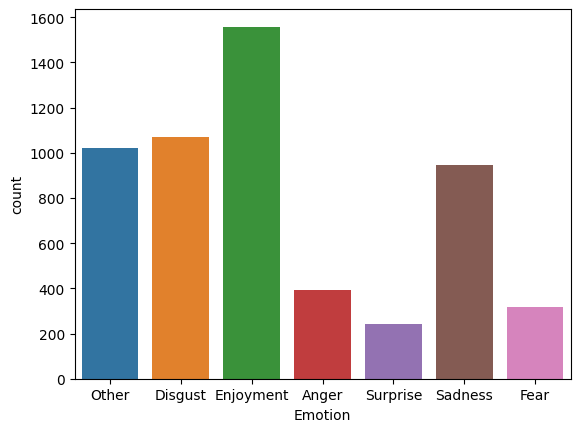

In [32]:
sns.countplot(x='Emotion', data=train_df)

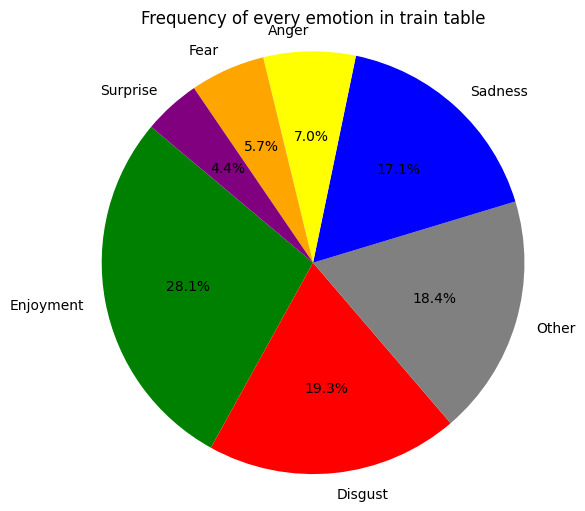

In [33]:
# Màu sắc cho các phần của biểu đồ
colors = ['green', 'red', 'gray',"blue","yellow","orange","purple"]

label =["Enjoyment","Disgust","Other", "Sadness", "Anger","Fear", "Surprise"]

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(train_freq, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of every emotion in train table')
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()


2. Val table

<Axes: xlabel='Emotion', ylabel='count'>

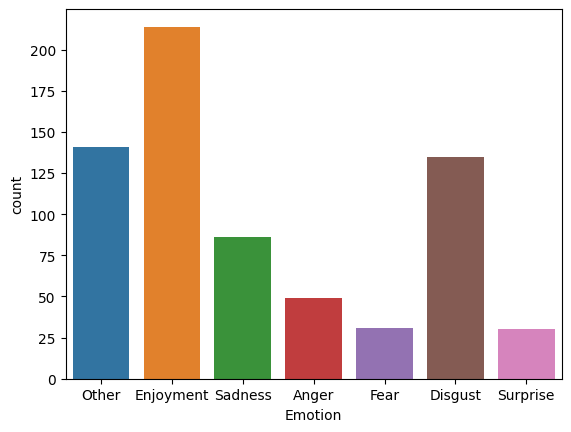

In [34]:
sns.countplot(x='Emotion', data=val_df)

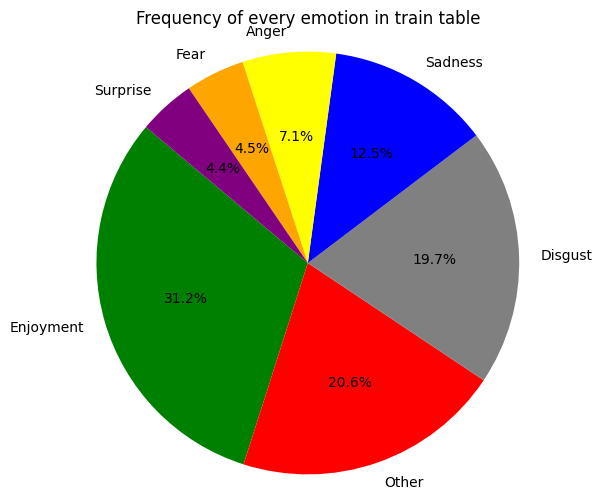

In [35]:
# Màu sắc cho các phần của biểu đồ
colors = ['green', 'red', 'gray',"blue","yellow","orange","purple"]

label =["Enjoyment","Other","Disgust", "Sadness", "Anger","Fear", "Surprise"]

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(val_freq, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of every emotion in train table')
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()

3. Test table

<Axes: xlabel='Emotion', ylabel='count'>

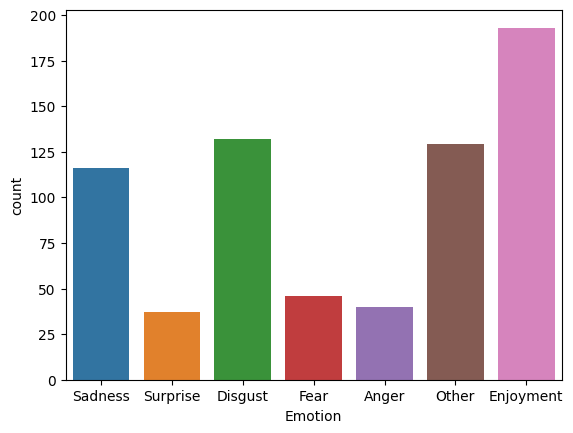

In [36]:
sns.countplot(x='Emotion', data=test_df)

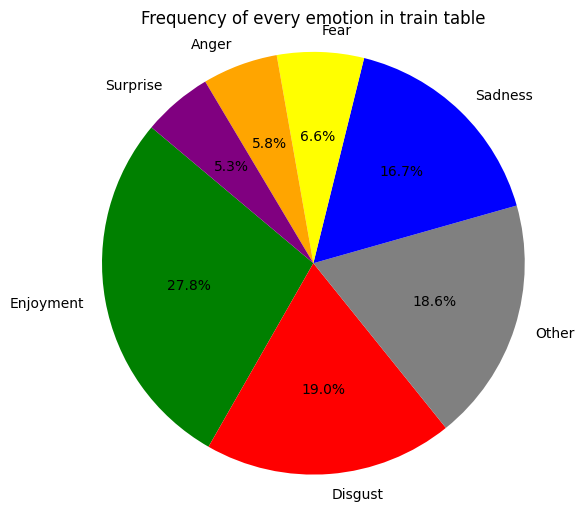

In [37]:
# Màu sắc cho các phần của biểu đồ
colors = ['green', 'red', 'gray',"blue","yellow","orange","purple"]

label =["Enjoyment","Disgust","Other", "Sadness", "Fear","Anger", "Surprise"]

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(test_freq, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of every emotion in train table')
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()

4. A table that contains all from 3 tables: train, val, test

In [38]:
# Create a table that consists of 3 tables: train, val, test
all_df = pd.concat([train_df, val_df, test_df], ignore_index=True)
all_df

,Emotion,Sentence
0,Other,cho mình xin bài nhạc tên là gì với ạ
1,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...
6922,Sadness,lúc thì cuốc đất è cổ ra không có giun mà câu ...
6923,Enjoyment,các bác dẫn crush qua cây sữa nay mà hứng nước...
6924,Surprise,vợ chồng rồi mà trong sáng như này chỉ có tron...
6925,Other,bep này vào binh dương dùng xuất


In [39]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6927 entries, 0 to 6926
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Emotion   6927 non-null   object
 1   Sentence  6927 non-null   object
dtypes: object(2)
memory usage: 108.4+ KB


In [40]:
all_df.describe()

,Emotion,Sentence
count,6927,6927
unique,7,6921
top,Enjoyment,nhìn cái bản mặt bà ta mà ghét thay . tham vô ...
freq,1965,2


In [41]:
all_freq = all_df["Emotion"].value_counts()
all_freq

Emotion
Enjoyment    1965
Disgust      1338
Other        1291
Sadness      1149
Anger         480
Fear          395
Surprise      309
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

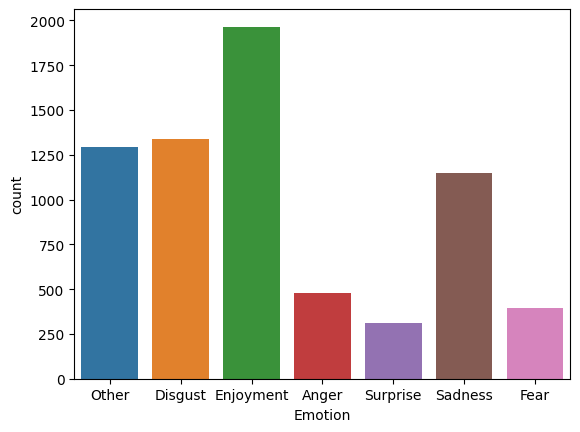

In [42]:
sns.countplot(x='Emotion', data=all_df)

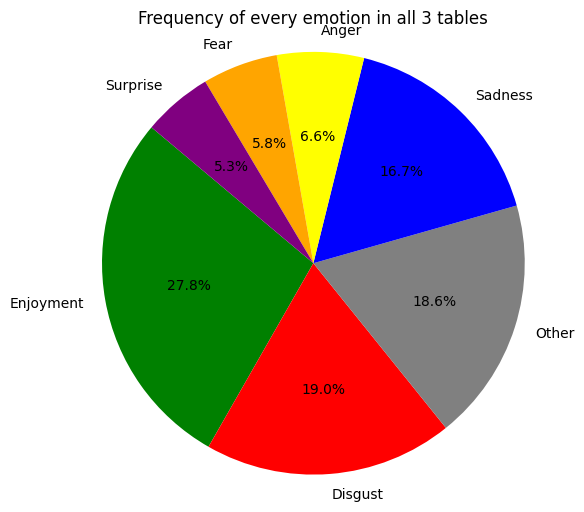

In [43]:
# Màu sắc cho các phần của biểu đồ
colors = ['green', 'red', 'gray',"blue","yellow","orange","purple"]

label =["Enjoyment","Disgust","Other", "Sadness", "Anger","Fear", "Surprise"]

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(test_freq, labels=label, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of every emotion in all 3 tables')
plt.axis('equal')  # Đảm bảo biểu đồ tròn không bị méo
plt.show()

# Component Analysis

1. Enjoyment emotion

In [44]:
enjoyment_df = all_df[all_df["Emotion"] == "Enjoyment"]
enjoyment_df

,Emotion,Sentence
3,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
10,Enjoyment,công nhận sáng tạo thật đấy
13,Enjoyment,minh biết nữa ne
19,Enjoyment,sau em này mà làm cô giáo ngồi kể chuyện hs lạ...
...,...,...
6910,Enjoyment,per ông đó có đôi mắt đẹp ghê
6916,Enjoyment,còn chặt cả cây ổi của hàng xóm để lấy cái chạ...
6918,Enjoyment,chúng mày cứ cười . dm mai gần đấy có biến lại...
6920,Enjoyment,tự nhiên mình xem và mỉm cười theo .


In [45]:
enjoyment_df.describe()

,Emotion,Sentence
count,1965,1965
unique,1,1965
top,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
freq,1965,1


In [46]:
def contains_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))


In [47]:
# Ví dụ sử dụng hàm kiểm tra
# text1 = "I'm feeling so today!"
# text2 = "I'm really happy about this."
# text3 = "đẹp quá v 😍😍"

# print(contains_emoji(text1))  # True
# print(contains_emoji(text2))  # False
# print(contains_emoji(text3))  # False

In [48]:
# Áp dụng hàm kiểm tra vào cột "Sentences" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = enjoyment_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 484


2. Disgust emotion

In [49]:
disgust_df = all_df[all_df["Emotion"] == "Disgust"]
disgust_df

,Emotion,Sentence
1,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
11,Disgust,đòn tấn công cực gắt và cục sút của anh 😂😂😂
14,Disgust,mấy thằng củ lol việt nam nhảm nhí :))
21,Disgust,coi video chưa hiểu gì đã làm ầm lên
...,...,...
6895,Disgust,"rãnh vãi , kiếm cái gì làm đi"
6896,Disgust,per chuẩn . gọi công an cho lành . cãi cộ chẳn...
6900,Disgust,đụ mẹ ngu à :)) có thiếu chỗ đéo nào cho mày v...
6911,Disgust,có vậy ông mới có công chuyện làm mà kiếm tiền...


In [50]:
disgust_df.describe()

,Emotion,Sentence
count,1338,1338
unique,1,1336
top,Disgust,nhìn cái bản mặt bà ta mà ghét thay . tham vô ...
freq,1338,2


In [51]:
# Áp dụng hàm kiểm tra vào cột "Sentence" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = disgust_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 166


3. Sadness emotion

In [52]:
sadness_df = all_df[all_df["Emotion"] == "Sadness"]
sadness_df

,Emotion,Sentence
9,Sadness,per nghe đi rồi khóc 1 trận cho thoải mái . đừ...
15,Sadness,tui thi ́ ch va ̉ i lă ́ mày ma ̀ ăn nhỉ ̀ u n...
24,Sadness,mày định lướt qua rồi nhưng khi đọc bình luận ...
25,Sadness,xin đi chơi với bạn ngày tổng kết không cho cứ...
32,Sadness,"hồi học lớp 5 bảo bố đi mua sgk cho , xong bố ..."
...,...,...
6899,Sadness,cứu em nó với
6909,Sadness,giờ cắt bộ móng đi cái tay vẫn cứ bị phế khó m...
6913,Sadness,địt mẹ đời tao
6917,Sadness,chắc là uncrush thôi . bố mẹ thì còng lưng ra ...


In [53]:
sadness_df.describe()

,Emotion,Sentence
count,1149,1149
unique,1,1149
top,Sadness,per nghe đi rồi khóc 1 trận cho thoải mái . đừ...
freq,1149,1


In [54]:
# Áp dụng hàm kiểm tra vào cột "Sentence" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = sadness_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 242


4. Anger emotion

In [55]:
anger_df = all_df[all_df["Emotion"] == "Anger"]
anger_df

,Emotion,Sentence
5,Anger,thằng kia sao mày bắt vợ với bồ tao dọn thế ki...
8,Anger,"ko phải con mình , mà xem còn thấy đau như vậy..."
20,Anger,"con chó đăng video , mày bị ngu à mà mỗi mẩu l..."
26,Anger,cá nhân mình nghĩ nó dừng hay đỗ đúng sai thì ...
40,Anger,đéo được tích sự gì 😂
...,...,...
6835,Anger,mấy thằng mặt địt . chim chưa mọc đủ lông mà l...
6857,Anger,mày ăn xong thì cút luôn dùm nha 🙂
6863,Anger,crush đéo bị thịt nhé :d nó cũng ế vãi vì tội ...
6887,Anger,cho thằng khác ăn ốc bắt bố đổ vỏ à 🤣


In [56]:
anger_df.describe()

,Emotion,Sentence
count,480,480
unique,1,480
top,Anger,thằng kia sao mày bắt vợ với bồ tao dọn thế ki...
freq,480,1


In [57]:
# Áp dụng hàm kiểm tra vào cột "Sentence" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = anger_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 61


5. Fear emotion

In [58]:
fear_df = all_df[all_df["Emotion"] == "Fear"]
fear_df

,Emotion,Sentence
18,Fear,thời buổi bây chừ chuyện gì cũng có thể xảy ra...
27,Fear,từ đầu năm giờ chắc chụp 10 lần rồi huhu sợ qu...
28,Fear,t gặp quả này thì bỏ xe mà chạy ??
31,Fear,muốn share về mà sợ bị bạn nè phẫn nộ quá
34,Fear,"cv không áp lực , môi trường xung quanh mới dễ..."
...,...,...
6862,Fear,phim kinh dị vào cái trời âm u 😒
6873,Fear,"hôm nào đi học về cũng phải đi qa , nhà nuôi l..."
6891,Fear,mỗi lần coi lại sởn gai ốc
6901,Fear,tao thì sợ nhất lúc nó mới cắt tóc


In [59]:
fear_df.describe()

,Emotion,Sentence
count,395,395
unique,1,394
top,Fear,nguy hiểm lắm
freq,395,2


In [60]:
# Áp dụng hàm kiểm tra vào cột "Sentence" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = fear_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 72


6. Surprise emotion

In [61]:
surprise_df = all_df[all_df["Emotion"] == "Surprise"]
surprise_df

,Emotion,Sentence
7,Surprise,thật hay đùa ác vậy . không thể tin được
30,Surprise,per đây mí chính là cụ tổ của những chiếc sừng...
48,Surprise,canh thời gian đăng đúng vãi !
70,Surprise,xem cái này mới biết vốn tiếng anh của mình cũ...
80,Surprise,không hiểu sao nhìu người lại thả haha nhỉ ??
...,...,...
6867,Surprise,bọn trẻ trung quốc thời nay ăn gì mà cao thế nhỉ
6892,Surprise,con người giỏi nhỉ .
6904,Surprise,đúng là ổng có vợ rồi có khác . không cần lấy ...
6924,Surprise,vợ chồng rồi mà trong sáng như này chỉ có tron...


In [62]:
surprise_df.describe()

,Emotion,Sentence
count,309,309
unique,1,308
top,Surprise,bài này hay quá
freq,309,2


In [63]:
# Áp dụng hàm kiểm tra vào cột "Sentence" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = surprise_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 31


7. "Other" emotion

In [64]:
other_df = all_df[all_df["Emotion"] == "Other"]
other_df

,Emotion,Sentence
0,Other,cho mình xin bài nhạc tên là gì với ạ
6,Other,một lí do trog muôn vàn lí do
12,Other,trời nắng nóng thế này mình muốn bán nước khôn...
16,Other,"bếp dầu , nhiều nhà vẫn dùng"
17,Other,nếu thấy phụ nữ quá phức tạp để hiểu và chinh ...
...,...,...
6912,Other,phim gì z .. thánh nữ nào cho biết cái chủ đề ...
6915,Other,nó cứ sai sai thế nào ấy
6919,Other,gửi nhầm video mình hát chế cho nó nghe
6921,Other,bạn ăn cơm chưa ?


In [65]:
other_df.describe()

,Emotion,Sentence
count,1291,1291
unique,1,1290
top,Other,đã năm 2000 . người ta cho mượn 200 tr rồi .. ...
freq,1291,2


In [66]:
# Áp dụng hàm kiểm tra vào cột "Sentence" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = other_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 147


8. A full-emotion table

In [67]:
all_df

,Emotion,Sentence
0,Other,cho mình xin bài nhạc tên là gì với ạ
1,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...
6922,Sadness,lúc thì cuốc đất è cổ ra không có giun mà câu ...
6923,Enjoyment,các bác dẫn crush qua cây sữa nay mà hứng nước...
6924,Surprise,vợ chồng rồi mà trong sáng như này chỉ có tron...
6925,Other,bep này vào binh dương dùng xuất


In [68]:
# Áp dụng hàm kiểm tra vào cột "Sentence" trong DataFrame và đếm số câu chứa emoji
num_sentences_with_emoji = all_df['Sentence'].apply(contains_emoji).sum()

# In kết quả
print(f"Số câu có chứa emoji: {num_sentences_with_emoji}")

Số câu có chứa emoji: 1203


# Data pre-processing


The step and order of data preprocessing can be changed using a list (i.e [1, 3, 4, 6])
1. Standardize words (remove all words contains numbers, punctuations, duplicated words)
2. Convert emojis and emoticons into text (in english)
3. Convert converted emojis and emoticons into vietnamese
4. Fix misspelling, abbreviations 
5. Remove some particular words (just pronouns)
6. Remove one-length words (word contains one character)

Inform necessary lists and dictionary

In [69]:
vnese_stop_words_list = [
    "ai",
    "anh",
    "cha",
    "bố",
    "bà",
    "bác",
    "bạn",
    "tao",
    "mẹ",
    "con",
    "mày",
    "em",
    "mình",
    "tớ",
    "tôi",
    "nó",
    "hắn",
    "cụ",
    "chú",
    "cậu",
    "mợ",
    "dì",
    "thím",
    "anh", 
    "con",
    "cháu",
    "lão",
    "huynh",
    "đệ"
]

In [70]:
emotion_dist = {
    "Enjoyment": 0,
    "Fear": 1,
    "Anger": 2,
    "Sadness": 3,
    "Disgust": 4,
    "Surprise": 5,
    "Other": 6
}

In [71]:
emoticon_dist = {
    ":)": ":smiling_face:",
    "☻": ":smiling_face:",
    "☺": ":smiling_face:",
    "=)": ":smiling_face:",
    ":‑)": ":smiling_face:",
    ":)": ":smiling_face:",
    ":-]": ":smiling_face:",
    ":]": ":smiling_face:",
    ":->": ":smiling_face:",
    ":>": ":smiling_face:",
    "8-)": ":smiling_face:",
    "8)": ":smiling_face:",
    ":-}": ":smiling_face:",
    ":}": ":smiling_face:",
    ":o)": ":smiling_face:",
    ":c)": ":smiling_face:",
    ":^)": ":smiling_face:",
    "=]": ":smiling_face:",
    "=)": ":smiling_face:",
    ":-)": ":smiling_face:",
    ":(": ":frowning_face:",
    ":c": ":frowning_face",
    "-.-": ":shaming_face:",
    "- _ -": ":shaming_face:",
    "xD": ":smiling_face:",
    "XD": ":smiling_face:",
    "@@": ":surprise_face:",
    ':">': ":tears_of_happiness:",
    ":v": ":surprise_face:",
    ":V": ":surprise_face:",
    ":3": ":playful_face:",
    ":<": ":frowning_face:",
    ">:(": ":angry_face:",
    ">:[": ":angry_face",
    ":'(": ":crying_face:",
    "• 3 •": ":cute_face:",
    "xd": ":shaming_face:",
    "uwu": ":cute_face:",
    "UwU": ":cute_face:",
    "owo": ":cute_face:",
    "OwO": ":cute_face:",
    "<\3": ":broken_heart:",
    "<3": ":heart:"
}

In [72]:
emoji_vietnamese_dist = {
    ":crying_face:": "khóc",
    ":thumbs_down:": "không thích",
    ":kissing_face_with_closed_eyes:": "cảm ơn",
    ":confounded_face:": "xấu hổ",
    ":woman_facepalming_light_skin_tone:": "bất lực",
    ":frowning_face_with_open_mouth:": "thất vọng",
    ":two_hearts:": "yêu",
    ":sad_but_relieved_face:": "căng thẳng",
    ":beaming_face_with_smiling_eyes:": "vui sướng",
    ":cloud_with_rain:": "mưa",
    ":new_moon_face:": "mỉa mai",
    ":broken_heart:": "buồn",
    ":fearful_face:": "sợ hãi",
    ":face_with_hand_over_mouth:": "im lặng",
    ":thumbs_up:": "thích",
    ":star-struck:": "ngưỡng mộ",
    ":spider_web:": "mạng nhện",
    ":angry_face:": "tức giận",
    ":weary_face:": "mệt mỏi",
    ":face_with_open_mouth:": "ngạc nhiên",
    ":neutral_face:": "bình thường",
    ":man_facepalming_light_skin_tone:": "bất lực",
    ":smiling_face_with_hearts:": "niềm vui",
    ":ghost:": "dễ thương",
    ":dog:": "chó",
    ":pile_of_poo:": "đống phân",
    ":smiling_face_with_open_hands:": "cởi mở",
    ":crying_cat:": "khóc",
    ":sleepy_face:": "buồn ngủ",
    ":expressionless_face:": "vô cảm",
    ":money-mouth_face:": "giàu có",
    ":red_heart:": "yêu",
    ":grinning_face_with_big_eyes:": "vui vẻ",
    ":face_with_monocle:": "tìm hiểu",
    ":slightly_frowning_face:": "buồn rầu",
    ":kiss_mark:": "hôn",
    ":upside-down_face:": "mỉa mai",
    ":relieved_face:": "nhẹ nhõm",
    ":clapping_hands:": "vỗ tay",
    ":frowning_face:": "buồn bã",
    ":grinning_face:": "rất vui",
    ":face_with_tears_of_joy:": "vui phát khóc",
    ":face_screaming_in_fear:": "sợ hãi",
    ":grimacing_face:": "lo lắng",
    ":persevering_face:": "khó chịu",
    ":thinking_face:": "đắn đo",
    ":beating_heart:": "yêu thích",
    ":heart_suit:": "tình yêu",
    ":rolling_on_the_floor_laughing:": "cưới lăn lộn",
    ":shushing_face:": "im lặng",
    ":woman_facepalming:": "bất lực",
    ":squinting_face_with_tongue:": "vui vẻ",
    ":woman_pouting_light_skin_tone:": "tức giận",
    ":pensive_face:": "trầm ngâm",
    ":smiling_face_with_heart-eyes:": "tình yêu",
    ":full_moon_face:": "chế giễu",
    ":enraged_face:": "rất tức giận",
    ":anxious_face_with_sweat:": "lo sợ",
    ":zany_face:": "hài hước",
    ":face_with_raised_eyebrow:": "nghi ngờ",
    ":tired_face:": "mệt mỏi",
    ":smirking_face:": "tinh nghịch",
    ":sleeping_face:": "buồn ngủ",
    ":winking_face:": "hài hước",
    ":face_with_steam_from_nose:": "tức giận",
    ":face_with_symbols_on_mouth:": "tức giận",
    ":flushed_face:": "xấu hổ",
    ":kissing_face:": "hôn",
    ":confused_face:": "bối rối",
    ":face_with_rolling_eyes:": "buồn chán",
    ":smiling_cat_with_heart-eyes:": "tình yêu",
    ":winking_face_with_tongue:": "hài hước",
    ":loudly_crying_face:": "khóc to",
    ":face_without_mouth:": "im lặng",
    ":slightly_smiling_face:": "cười mỉm",
    ":smiling_face_with_smiling_eyes:": "vui vẻ",
    ":OK_hand:": "được thôi",
    ":face_vomiting:": "kinh tởm",
    ":clapping_hands_light_skin_tone:": "vỗ tay",
    ":anguished_face:": "tức giận",
    ":cat_with_tears_of_joy:": "bất lực",
    ":nauseated_face:": "buồn nôn",
    ":hot_face:": "gợi cảm",
    ":flexed_biceps:": "cơ bắp",
    ":downcast_face_with_sweat:": "căng thẳng",
    ":disappointed_face:": "thất vọng",
    ":smiling_face_with_horns:": "nham hiểm",
    ":index_pointing_up:": "ngón trỏ",
    ":folded_hands:": "cảm ơn",
    ":smiling_face_with_sunglasses:": "tự tin",
    ":exploding_head:": "khó chịu",
    ":drooling_face:": "khát khao",
    ":grinning_face_with_smiling_eyes:": "vui vẻ",
    ":victory_hand:": "chiến thắng",
    ":sneezing_face:": "hắt xì",
    ":grinning_squinting_face:": "hài hước",
    ":grinning_face_with_sweat:": "khó xử",
    ":woman_dancing:": "nhảy múa",
    ":cherry_blossom:": "hoa anh đào",
    ":dog_face:": "chó",
    ":surprise_face:": "ngạc nhiên",
    ":shaming_face:": "xấu hổ",
    ":playful_face:": "vui đùa",
    ":tears_of_happiness:": "mừng sắp khóc",
    ":smiling_face:": "cười",
    ":face_blowing_a_kiss:": "yêu đương",
    ":unamused_face:": "khó chịu",
    ":face_with_head-bandage:": "đau đớn",
    ":face_savoring_food:": "thèm thuồng",
    ":cute_face:": "dễ thương",
    ":heart:": "yêu",
    ":broken_heart:": "buồn",
    ":love-you_gesture:": "mình yêu bạn"
}

In [73]:
spell_correct_dist = {
    "zui": "vui",
    "thw": "thương",
    "đéo": "không",
    "mng": "mọi người",
    "dể": "dễ",
    "đmm": "địt mẹ mày",
    "duới": "dưới",
    "đỉ": "đĩ",
    "đuỹ": "đĩ",
    "tuỳ": "tùy",
    "klk": "haha",
    "skil": "skill",
    "trog": "trong",
    "ko": "không",
    "per": "bạn",
    "trất": "chốt",
    "hs": "học sinh",
    "pạt": "phạt",
    "t": "tao",
    "sgk": "sách giáo khoa",
    "cv": "công việc",
    "kq": "kết quả",
    "dzầy": "vậy",
    "mj": "mặt dày",
    "c": "chị",
    "ad": "admin",
    "ah": "à",
    "z": "vậy",
    "nhìu": "nhiều",
    "cta": "chúng ta",
    "đm": "địt mẹ",
    "v": "vậy",
    "ks": "khách sạn",
    "àk": "à",
    "k": "không",
    "m": "mày",
    "ngulon": "ngu lồn",
    "vkl": "vãi cả lồn",
    "dume": "đụ mẹ",
    "hoà": "hòa",
    "nyc": "người yêu cũ",
    "nge": "nghe",
    "zi": "vậy",
    "chẳn": "chẳng",
    "bos": "boss",
    "sứng": "xứng",
    "of": "của",
    "kip": "kịp",
    "g": "gì",
    "volum": "volume",
    "chowi": "chơi",
    "dlm": "đĩ lồn má",
    "ghêe": "ghê",
    "gane": "game",
    "fải": "phải",
    "or": "hoặc",
    "zời": "trời",
    "viẹc": "việc",
    "vler": "vãi lồn",
    "giớ": "giới",
    "zo": "vào",
    "tr": "trước",
    "nta": "người ta",
    "thậc": "thật",
    "lsao": "là sao",
    "mặp": "mập",
    "hàg": "hàng",
    "vcb": "vãi cả buồi",
    "tý": "tí",
    "time": "thời gian",
    "mink": "mình",
    "nv": "nhân viên",
    "thuờg": "thường",
    "loai": "loại",
    "dõ": "rõ",
    "vl": "vãi lồn",
    "thuoc": "thuộc",
    "bat": "bắt",
    "kiem": "kiếm",
    "chời": "trời",
    "shiper": "shipper",
    "quáa": "quá",
    "del": "đéo",
    "dcm": "địt con mẹ",
    "hoạ": "họa",
    "th": "thằng",
    "vn": "việt nam",
    "ng": "người",
    "phia": "khuya",
    "lìn": "lồn",
    "ntnay": "từ nay",
    "cm": "con mẹ",
    "lun": "luôn",
    "trol": "troll",
    "cf": "cafe",
    "cở": "cởi",
    "thg": "thằng",
    "dth": "dễ thương",
    "hjxhjx": "hic hic",
    "ngta": "ngươi ta",
    "hloz": "hãm lồn",
    "ac": "anh chị",
    "hâha": "haha",
    "zai": "trai",
    "đựoc": "được",
    "híc": "hic",
    "rhì": "thì",
    "zay": "vậy",
    "zoe": "xoe",
    "záy": "váy",
    "diển": "diễn",
    "hlv": "huấn luyện viên",
    "đbh": "không bình thường",
    "tno": "tụi nó",
    "dùm": "giùm",
    "độg": "động",
    "cs": "cuộc sống",
    "hoả": "hỏa",
    "hp": "hạnh phúc",
    "gê": "ghê",
    "bth": "bình thường",
    "cẩng": "cẳng",
    "sời": "giởi",
    "kara": "karaoke",
    "loz": "lồn",
    "facebok": "facebook",
    "mừn": "mình",
    "rùi": "rồi",
    "chuc": "chúc",
    "toà": "tòa",
    "inter": "internet",
    "kau": "tao",
    "dt": "điện thoại",
    "xog": "xong",
    "doạ": "dọa",
    "hoc": "học",
    "dg": "đang",
    "dap": "đáp",
    "rat": "rất",
    "tuyet": "tuyệt",
    "saolol": "xạo lồn",
    "bn": "bạn",
    "troét": "trét",
    "ak": "à",
    "đzai": "đẹp trai",
    "iêu": "yêu",
    "thíu": "thiếu",
    "ukm": "ừm",
    "rỡi": "rời",
    "caphe": "cà phê",
    "tn": "thế này",
    "sg": "sài gòn",
    "bep": "không",
    "kbh": "không bình thường",
    "xĩu": "xỉu",
    "mềnh": "mình",
    "ĩa": "ỉa",
    "toau": "tao",
    "íu": "không",
    "bankon": "ban công",
    "đag": "đang",
    "rmit": "miết",
    "vcd": "vãi cả đái",
    "xh": "xã hội",
    "đếu": "không",
    "đỹ": "đĩ",
    "cmt": "comment",
    "đcm": "địt con mẹ",
    "mịa": "má",
    "ctay": "chia tay",
    "tuôi": "tôi",
    "qtrong": "quan trọng",
    "nghr": "nghe",
    "hoá": "hóa",
    "ds": "dễ sợ",
    "khoẻ": "khỏe",
    "đg": "đường",
    "hã": "hả",
    "cíu": "cứu",
    "xomg": "xong",
    "sx": "sản xuất",
    "hơm": "không",
    "shits": "shit",
    "lien": "liên",
    "fre": "free",
    "móe": "má",
    "đíu": "không",
    "hỉu": "hiểu",
    "godbye": "goodbye",
    "ây": "ấy",
    "ez": "dễ",
    "dme": "đụ mẹ",
    "thẳg": "thẳng",
    "ml": "mặt lồn",
    "niếm": "nếm",
    "xời": "trời",
    "đame": "sát thương",
    "nguối": "cúi",
    "đhs": "không hiểu sao",
    "giốg": "giống",
    "nhưg": "nhưng",
    "tưởg": "tưởng",
    "toè": "tòe",
    "tưong": "tương",
    "sug": "sung",
    "lám": "lắm",
    "vẫ": "vẫn",
    "post": "facebook",
    "màt": "mày",
    "xò": "sò",
    "dma": "đụ má",
    "gv": "giáo viên",
    "vid": "video",
    "doume": "đụ mẹ",
    "qcao": "quảng cáo",
    "hj": "hi",
    "nghờ": "ngờ",
    "xiền": "tiền",
    "thạ": "thả",
    "halo": "zalo",
    "hoy": "thôi",
    "cũnh": "cũng",
    "chữi": "chửi",
    "thiì": "thì",
    "dm": "địt mẹ",
    "kím": "kiếm",
    "cũg": "cũng",
    "ngưỡn": "ngưỡng",
    "oy": "rồi",
    "chj": "chị",
    "vướn": "vướng",
    "pê": "mang",
    "dkm": "địt con mẹ",
    "uoc": "ước",
    "duoc": "được",
    "top1": "top 1",
    "mat": "mà",
    "đúi": "đuối",
    "hịt": "hệt",
    "comt": "comment",
    "oke": "ok",
    "chổ": "chỗ",
    "xãy": "xảy",
    "nhât": "nhất",
    "cừi": "cười",
    "đọan": "đoạn",
    "phảu": "phải",
    "hix": "hic",
    "daklak": "đắc lắk",
    "chiêc": "chiếc",
    "đh": "đại học",
    "quâ": "quá",
    "qa": "quá",
    "đũy": "đĩ",
    "sat": "sát",
    "klq": "không liên quan",
    "bằg": "bằng",
    "nghệt": "nghệ",
    "đki": "đăng kí",
    "chúg": "chúng",
    "ngổng": "ngỗng",
    "cmnl": "con mẹ nó lồn",
    "quad": "quá",
    "vailon": "vãi lồn",
    "nhg": "nhưng",
    "truỵên": "truyện",
    "tks": "cảm ơn",
    "roai": "rồi",
    "đaumoa": "đụ má",
    "bit": "biết",
    "ngiu": "người yêu",
    "dv": "diễn viên",
    "virut": "virus",
    "7nam": "7 năm",
    "thặc": "thật",
    "cungz": "cũng",
    "maiz": "mãi",
    "lm": "làm",
    "choét": "trét",
    "màa": "mà",
    "gdinh": "gia đình",
    "stk": "số tài khoản",
    "nhiếu": "nhiều",
    "nhma": "nhưng mà",
    "đển": "đến",
    "ônc": "ông",
    "csong": "cuộc sống",
    "disme": "địt mẹ",
    "ngĩ": "nghĩ",
    "tq": "trung quốc",
    "tữn": "khùng",
    "xiaolon": "xạo lồn",
    "đcđ": "không chịu được",
    "thoả": "thỏa",
    "csgt": "cảnh sát giao thông",
    "xạolin": "xạo lồn",
    "blod": "blood",
    "kil": "kill",
    "xiaolin": "xạo lồn",
    "thiệc": "thật",
    "hịn": "xịn",
    "nãn": "nản",
    "mịe": "mẹ",
    "huỷ": "hủy",
    "hiuhiu": "huhu",
    "bt": "biết",
    "thíck": "thích",
    "cã": "cả",
    "àh": "à",
    "dis": "địt",
    "gvien": "giáo viên",
    "đma": "đụ má",
    "rược": "rượt",
    "chộm": "trộm",
    "céc": "cặc",
    "đkm": "địt con mẹ",
    "cđv": "cổ động viên",
    "cại": "lại",
    "chậy": "chị",
    "quí": "quý",
    "hêtd": "hết",
    "piza": "pizza",
    "kv": "khu vực",
    "hjhj": "hihi",
    "ful": "full",
    "hnua": "hôm nữa",
    "sốn": "sống",
    "bcs": "bao cao su",
    "sag": "sang",
    "mìh": "mình",
    "moẹ": "mẹ",
    "từg": "từng",
    "ngheng": "nhen",
    "xún": "xuống",
    "đx": "được",
    "mọe": "mẹ",
    "kphai": "không phải",
    "fr": "friend",
    "mod": "mood",
    "nũa": "nữa",
    "bede": "bê đê",
    "rồu": "rồi",
    "helo": "hello",
    "dống": "giống",
    "đựu": "đụ",
    "nguoi": "người",
    "đoá": "đóa",
    "ẳm": "ẳm",
    "nghia": "nghĩa",
    "het": "hết",
    "liết": "liếc",
    "hỏg": "hỏng",
    "đep": "đẹp",
    "sn": "sinh nhật",
    "dòg": "dòng",
    "mxh": "mạng xã hội",
    "chg": "chẳng",
    "thằg": "thằng",
    "bổg": "bổng",
    "karaok": "karaoke",
    "thoy": "thôi",
    "xl": "xạo lồn",
    "qá": "quá",
    "cừng": "cũng",
    "mều": "mèo",
    "vlon": "vãi lồn",
    "troai": "trai",
    "ava": "avatar",
    "qúa": "quá",
    "folow": "follow",
    "thât": "thật",
    "đuợc": "được",
    "ngừoi": "người",
    "càrôt": "cà rốt",
    "kô": "không",
    "vửa": "vừa",
    "clm": "con lồn má",
    "xink": "xinh",
    "xoè": "xòe",
    "tg": "thời gian",
    "nhoà": "nhòa",
    "valungtung": "lung tung",
    "hoạng": "hoảng",
    "đaklak": "đắk lắk",
    "hk": "không",
    "ỏo": "ồ",
    "nghiêp": "nghiệp",
    "ju": "giữ",
    "jin": "gìn",
    "mlz": "mặt lồn",
    "matlon": "mặt lồn",
    "haizx": "vãi",
    "ny": "người yêu",
    "cug": "cũng",
    "gío": "gió",
    "bđ": "bóng đá",
    "bthg": "bình thường",
    "vliz": "vãi lồn",
    "đág": "đáng",
    "ngỗg": "ngỗng",
    "hịu": "hiệu",
    "đúg": "đúng",
    "rụg": "rụng",
    "trg": "trường",
    "vks": "vãi cả lồn",
    "chẹ": "chọe",
    "mis": "miss",
    "zị": "vị",
    "dzậy": "vậy",
    "khôg": "không",
    "dhs": "không hiểu sao",
    "gvcn": "giáo viên chủ nhiệm",
    "coá": "quá",
    "hqua": "hôm qua",
    "géc": "ghét",
    "nhaỷ": "nhảy",
    "lổi": "lỗi",
    "thik": "thích",
    "noá": "nó",
    "chuân": "chuẩn",
    "chụy": "chị",
    "mòa": "mà",
    "hnao": "hôm nào",
    "galang": "ga lăng",
    "giay": "giây",
    "nthe": "như thế",
    "douma": "đụ má",
    "đẹo": "đẹp",
    "gheê": "ghê",
    "nuôn": "luôn",
    "gét": "ghét",
    "chêu": "trêu",
    "buf": "buff",
    "vcl": "vãi cả lồn",
    "síu": "xíu",
    "zồi": "giời",
    "mừ": "mà",
    "trym": "chim",
    "adim": "admin",
    "nhình": "nhìn",
    "cofe": "coffee",
    "loat": "loạt",
    "hc": "học",
    "zại": "dạy",
    "moij": "mọi",
    "cườ": "cười",
    "hiếmk": "hiếm",
    "cng": "con người",
    "masage": "massage",
    "ngọai": "ngoại",
    "cđcm": "cái địt con mẹ",
    "êi": "ơi",
    "tml": "thằng mặt lồn",
    "oimeoi": "ôi mẹ ơi",
    "ron": "rôn",
    "chyện": "chuyện",
    "ngẵn": "ngắn",
    "thõa": "xõa",
    "ụa": "ủa",
    "lôz": "lồn",
    "truong": "trường",
    "hop": "hợp",
    "thuong": "thương",
    "khac": "khác",
    "riền": "riêng",
    "ae": "anh em",
    "biet": "biết",
    "tiep": "tiếp",
    "tnao": "thế nào",
    "mợt": "mệt",
    "chetme": "chết mẹ",
    "pải": "phải",
    "nhưnh": "nhưng",
    "thix": "thích",
    "gơm": "gớm",
    "găp": "gặp",
    "ùi": "rồi",
    "suong": "sướng",
    "bjt": "biết",
    "tôgn": "tồn",
    "củng": "cũng",
    "oto": "ô tô",
    "haiz": "thở dài",
    "ẻ": "ỉa",
    "ay": "này",
    "ok": "đồng ý",
    "móa": "má",
    "moá": "má",
    "giởi": "trời",
    "ự": "hự",
    "ừm": "ừ",
    "mổi": "mỗi",
    "haiza": "buồn",
    "ưi": "ơi",
    "tiển": "triển",
    "kỉu": "kiểu",
    "ghệ": "người yêu",
    "col": "coi",
    "nhãm": "nhảm",
    "chuỵ": "chị",
    "iem": "em",
    "phìm": "phim",
    "ỏ": "ồ",
    "ẻm": "em ấy",
    "ôtô": "ô tô",
    "chỉa": "chìa",
    "mớinxem": "mới xem",
    "chs": "chả hiểu sao",
    'uớc': 'ước',
    'fa': 'cô đơn',
    'clgt': 'cái lồn gì thế',
    'khùm': 'khùng',
    'ak': 'à',
    'đin': 'điên',
    'mài': 'mày',
    'xèm': 'xàm',
    'dui': 'vui',
    'hông': 'không',
    'bùn': 'buồn',
    'bít': 'biết',
    'nma': 'nhưng mà',
    'mún': 'muốn',
    'bỉn': 'biển',
    'mớ': 'mới',
    'nhén': 'nhắn',
    'dịt': 'việt',
    'chít': 'chết',
    'mịa': 'mẹ',
    'dị': 'vậy',
    'đel': 'không',
    'del': 'không',
    'nhma': 'nhưng mà',
    'quớ': 'quá',
    'try': 'trai',
    'mọe': 'mẹ',
    'zãi': 'vãi',
    'dìa': 'về',
    'lém': 'lắm',
    'lừi': 'lười',
    'cbi': 'chuẩn bị',
    'ngèo': 'nghèo',
    'chóa': 'chó',
    'qué': 'quá',
    'mún': "muốn",
    'nch': 'nói chuyện',
    'lìn': 'lồn',
    'ik': 'đi',
    'éo': 'không',
    'thứk': 'thức',
    'mịt': "mệt",
    'pek': 'biết',
    'quãi': 'vãi',
    'hok': 'không',
    'mey': 'may',
    'đún': 'đúng',
    'gùi': 'rồi',
    'hỏ': 'hở',
    'hum': 'hôm',
    'm': 'mày',
    'đc': 'được',
    'tr': 'trời',
    'j': 'gì',
    'z': 'vậy',
    'r': 'rồi',
    'b': 'biết',
    'h': 'giờ',
    'k': 'không',
    'l': "lồn"
}

1. Standardize words (remove all words contains numbers, punctuations, duplicated words)

In [74]:
punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~₫"""
punc_set = set(punctuation)

In [75]:
def standardize_words(sentenceList):
        # Remove all numbers contain words
        standardize_words = [
            " ".join(
                [
                    word.lower()
                    for word in str(sentence).split()
                    if not any(char.isdigit() for char in word)
                ]
            )
            for sentence in sentenceList
        ]

        # Remove all duplicated characters (besides emojis)
        remove_duplicated = [
            " ".join(
                [
                    re.sub(r"(.)\1+", r"\1", word)
                    if emoji.emoji_count(word) == 0
                    else word
                    for word in sentence.split()
                ]
            )
            for sentence in standardize_words
        ]

        remove_punctuation = []

        # Remove all punctuation symbols using the puctuation set
        for sentence in remove_duplicated:
            sentence_placeholder = sentence.split()
            words_list = []

            for word in sentence_placeholder:
                if punc_set.isdisjoint(word):
                    words_list.append(word)
                elif word in emoticon_dist:
                    words_list.append(word)

            remove_punctuation.append(" ".join(words_list))

        return remove_punctuation

In [76]:
remove_punctuation = train_df["Sentence"].apply(lambda x: standardize_words(x))

In [77]:
remove_punctuation

0       [c, h, o, , m, ì, n, h, , x, i, n, , b, à, i, ...
1       [c, h, o, , đ, á, n, g, , đ, ờ, i, , c, o, n, ...
2       [l, o, , h, ọ, c, , đ, i, , , , y, ê, u, , đ, ...
3       [u, ớ, c, , g, ì, , s, a, u, , n, à, y, , v, ề...
4       [m, ỗ, i, , l, ầ, n, , c, ó, , v, i, d, e, o, ...
                              ...                        
5543    [đ, ư, ờ, n, g, , c, ủ, a, , n, h, à, , c, ụ, ...
5544    [n, h, ì, n, , m, ặ, t, , h, é, o, , q, u, e, ...
5545    [t, a, o, , đ, i, , x, e, , m, á, y, , m, ỗ, i...
5546    [t, h, í, c, h, , t, h, â, n, , h, ì, n, h, , ...
5547    [ư, ớ, c, , m, ơ, , n, h, ỏ, , n, h, o, i, , c...
Name: Sentence, Length: 5548, dtype: object

In [78]:
remove_punctuation_1 = val_df["Sentence"].apply(lambda x: standardize_words(x))

In [79]:
remove_punctuation_1

0      [t, í, n, h, , t, a, o, , t, a, o, , b, i, ế, ...
1      [l, ạ, i, , l, à, , l, à, o, , c, a, i, , , , ...
2                [b, ị, , t, ừ, , c, h, ố, i, , r, ồ, i]
3      [t, a, m, , đ, ả, o, , t, r, ờ, i, , đ, ẹ, p, ...
4      [đ, ọ, c, , b, ì, n, h, , l, u, ậ, n, , c, ủ, ...
                             ...                        
681                 [n, h, ọ, c, , l, ò, n, g, , , , , ]
682    [t, a, o, , đ, ã, , r, ấ, t, , m, u, ố, n, , l...
683    [c, ơ, m, , t, ấ, m, , ở, , n, g, o, à, i, , c...
684    [c, h, ấ, t, , l, i, ệ, u, , đ, ỉ, n, h, , q, ...
685    [d, u, m, e, , l, ũ, , m, ấ, t, , d, ạ, y, , ,...
Name: Sentence, Length: 686, dtype: object

In [80]:
remove_punctuation_2 = test_df["Sentence"] = test_df["Sentence"].apply(lambda x: standardize_words(x))

In [81]:
remove_punctuation_2

0      [n, g, ư, ờ, i, , t, a, , c, ó, , b, ạ, n, , b...
1      [c, h, o, , n, g, h, ỉ, , v, i, ê, c, , m, ó, ...
2                           [k, i, n, h, , v, ã, i, , 😡]
3      [n, h, à, , t, h, ì, , k, h, ô, n, g, , x, a, ...
4      [b, ố, , k, h, ô, n, g, , t, h, í, c, h, , n, ...
                             ...                        
688    [l, ú, c, , t, h, ì, , c, u, ố, c, , đ, ấ, t, ...
689    [c, á, c, , b, á, c, , d, ẫ, n, , c, r, u, s, ...
690    [v, ợ, , c, h, ồ, n, g, , r, ồ, i, , m, à, , t...
691    [b, e, p, , n, à, y, , v, à, o, , b, i, n, h, ...
692    [đ, ô, i, , m, ắ, t, , đ, ằ, m, , t, h, ắ, m, ...
Name: Sentence, Length: 693, dtype: object

2. Convert emojis and emoticons into text (in english)

In [82]:
def emoji_to_text(sentenceList):
        # Using the emoji library to convert all emojis into text
        sentence_emo_to_text = [
            emoji.demojize(sentence, delimiters=(":", ": "))
            for sentence in sentenceList
        ]
        sentence_emoticon_to_text = [
            " ".join(
                [
                    word if word not in emoticon_dist else f"{emoticon_dist[word]}"
                    for word in sentence.split()
                ]
            )
            for sentence in sentence_emo_to_text
        ]

        return sentence_emoticon_to_text

In [83]:
method_2_1 = train_df["Sentence"].apply(lambda x: emoji_to_text(x))

In [84]:
method_2_1

0       [c, h, o, , m, ì, n, h, , x, i, n, , b, à, i, ...
1       [c, h, o, , đ, á, n, g, , đ, ờ, i, , c, o, n, ...
2       [l, o, , h, ọ, c, , đ, i, , ., , y, ê, u, , đ,...
3       [u, ớ, c, , g, ì, , s, a, u, , n, à, y, , v, ề...
4       [m, ỗ, i, , l, ầ, n, , c, ó, , v, i, d, e, o, ...
                              ...                        
5543    [đ, ư, ờ, n, g, , c, ủ, a, , n, h, à, , c, ụ, ...
5544    [n, h, ì, n, , m, ặ, t, , h, é, o, , q, u, e, ...
5545    [t, a, o, , đ, i, , x, e, , m, á, y, , m, ỗ, i...
5546    [t, h, í, c, h, , t, h, â, n, , h, ì, n, h, , ...
5547    [ư, ớ, c, , m, ơ, , n, h, ỏ, , n, h, o, i, , c...
Name: Sentence, Length: 5548, dtype: object

In [85]:
method_2_2 = val_df["Sentence"].apply(lambda x: emoji_to_text(x))

In [86]:
method_2_2

0      [t, í, n, h, , t, a, o, , t, a, o, , b, i, ế, ...
1      [l, ạ, i, , l, à, , l, à, o, , c, a, i, , ,, ,...
2                [b, ị, , t, ừ, , c, h, ố, i, , r, ồ, i]
3      [t, a, m, , đ, ả, o, , t, r, ờ, i, , đ, ẹ, p, ...
4      [đ, ọ, c, , b, ì, n, h, , l, u, ậ, n, , c, ủ, ...
                             ...                        
681             [n, h, ọ, c, , l, ò, n, g, , :, (, (, (]
682    [t, a, o, , đ, ã, , r, ấ, t, , m, u, ố, n, , l...
683    [c, ơ, m, , t, ấ, m, , ở, , n, g, o, à, i, , c...
684    [c, h, ấ, t, , l, i, ệ, u, , đ, ỉ, n, h, , q, ...
685    [d, u, m, e, , l, ũ, , m, ấ, t, , d, ạ, y, , ....
Name: Sentence, Length: 686, dtype: object

In [87]:
method_2_3 = test_df["Sentence"].apply(lambda x: emoji_to_text(x))

In [88]:
method_2_2

0      [t, í, n, h, , t, a, o, , t, a, o, , b, i, ế, ...
1      [l, ạ, i, , l, à, , l, à, o, , c, a, i, , ,, ,...
2                [b, ị, , t, ừ, , c, h, ố, i, , r, ồ, i]
3      [t, a, m, , đ, ả, o, , t, r, ờ, i, , đ, ẹ, p, ...
4      [đ, ọ, c, , b, ì, n, h, , l, u, ậ, n, , c, ủ, ...
                             ...                        
681             [n, h, ọ, c, , l, ò, n, g, , :, (, (, (]
682    [t, a, o, , đ, ã, , r, ấ, t, , m, u, ố, n, , l...
683    [c, ơ, m, , t, ấ, m, , ở, , n, g, o, à, i, , c...
684    [c, h, ấ, t, , l, i, ệ, u, , đ, ỉ, n, h, , q, ...
685    [d, u, m, e, , l, ũ, , m, ấ, t, , d, ạ, y, , ....
Name: Sentence, Length: 686, dtype: object

3. Convert converted emojis and emoticons into vietnamese

In [89]:
def emoji_text_to_vietnamese(sentenceList):
        # Using a handmade dictionary to convert all emoji texts into vietnamese
        sentence_emoji_to_vnese = [
            " ".join(
                [
                    word
                    if word not in emoji_vietnamese_dist
                    else emoji_vietnamese_dist[word]
                    for word in sentence.split()
                ]
            )
            for sentence in sentenceList
        ]

        return sentence_emoji_to_vnese

In [90]:
method_3_1 = train_df["Sentence"].apply(lambda x: emoji_text_to_vietnamese(x))

In [91]:
method_3_1

0       [c, h, o, , m, ì, n, h, , x, i, n, , b, à, i, ...
1       [c, h, o, , đ, á, n, g, , đ, ờ, i, , c, o, n, ...
2       [l, o, , h, ọ, c, , đ, i, , ., , y, ê, u, , đ,...
3       [u, ớ, c, , g, ì, , s, a, u, , n, à, y, , v, ề...
4       [m, ỗ, i, , l, ầ, n, , c, ó, , v, i, d, e, o, ...
                              ...                        
5543    [đ, ư, ờ, n, g, , c, ủ, a, , n, h, à, , c, ụ, ...
5544    [n, h, ì, n, , m, ặ, t, , h, é, o, , q, u, e, ...
5545    [t, a, o, , đ, i, , x, e, , m, á, y, , m, ỗ, i...
5546    [t, h, í, c, h, , t, h, â, n, , h, ì, n, h, , ...
5547    [ư, ớ, c, , m, ơ, , n, h, ỏ, , n, h, o, i, , c...
Name: Sentence, Length: 5548, dtype: object

In [92]:
method_3_2 = val_df["Sentence"].apply(lambda x: emoji_text_to_vietnamese(x))

In [93]:
method_3_2

0      [t, í, n, h, , t, a, o, , t, a, o, , b, i, ế, ...
1      [l, ạ, i, , l, à, , l, à, o, , c, a, i, , ,, ,...
2                [b, ị, , t, ừ, , c, h, ố, i, , r, ồ, i]
3      [t, a, m, , đ, ả, o, , t, r, ờ, i, , đ, ẹ, p, ...
4      [đ, ọ, c, , b, ì, n, h, , l, u, ậ, n, , c, ủ, ...
                             ...                        
681             [n, h, ọ, c, , l, ò, n, g, , :, (, (, (]
682    [t, a, o, , đ, ã, , r, ấ, t, , m, u, ố, n, , l...
683    [c, ơ, m, , t, ấ, m, , ở, , n, g, o, à, i, , c...
684    [c, h, ấ, t, , l, i, ệ, u, , đ, ỉ, n, h, , q, ...
685    [d, u, m, e, , l, ũ, , m, ấ, t, , d, ạ, y, , ....
Name: Sentence, Length: 686, dtype: object

In [94]:
method_3_3 = test_df["Sentence"].apply(lambda x: emoji_text_to_vietnamese(x))

In [95]:
method_3_3

0      [n, g, ư, ờ, i, , t, a, , c, ó, , b, ạ, n, , b...
1      [c, h, o, , n, g, h, ỉ, , v, i, ê, c, , m, ó, ...
2                           [k, i, n, h, , v, ã, i, , 😡]
3      [n, h, à, , t, h, ì, , k, h, ô, n, g, , x, a, ...
4      [b, ố, , k, h, ô, n, g, , t, h, í, c, h, , n, ...
                             ...                        
688    [l, ú, c, , t, h, ì, , c, u, ố, c, , đ, ấ, t, ...
689    [c, á, c, , b, á, c, , d, ẫ, n, , c, r, u, s, ...
690    [v, ợ, , c, h, ồ, n, g, , r, ồ, i, , m, à, , t...
691    [b, e, p, , n, à, y, , v, à, o, , b, i, n, h, ...
692    [đ, ô, i, , m, ắ, t, , đ, ằ, m, , t, h, ắ, m, ...
Name: Sentence, Length: 693, dtype: object

4. Fix misspelling, abbreviations 

In [96]:
def spelling_check(sentenceList):
        # Using a handmade dictionary to check words and correct them
        spelling_fix = [
            " ".join(
                [
                    word if word not in spell_correct_dist else spell_correct_dist[word]
                    for word in sentence.split()
                ]
            )
            for sentence in sentenceList
        ]

        return spelling_fix

In [97]:
method_4_1 = train_df["Sentence"].apply(lambda x: spelling_check(x))
method_4_1

0       [chị, giờ, o, , mày, ì, n, giờ, , x, i, n, , b...
1       [chị, giờ, o, , đ, á, n, gì, , đ, ờ, i, , chị,...
2       [lồn, o, , giờ, ọ, chị, , đ, i, , ., , y, ê, u...
3       [u, ớ, chị, , gì, ì, , s, a, u, , n, à, y, , v...
4       [mày, ỗ, i, , lồn, ầ, n, , chị, ó, , vậy, i, d...
                              ...                        
5543    [đ, ư, ờ, n, gì, , chị, ủ, a, , n, giờ, à, , c...
5544    [n, giờ, ì, n, , mày, ặ, tao, , giờ, é, o, , q...
5545    [tao, a, o, , đ, i, , x, e, , mày, á, y, , mày...
5546    [tao, giờ, í, chị, giờ, , tao, giờ, â, n, , gi...
5547    [ư, ớ, chị, , mày, ơ, , n, giờ, ồ, , n, giờ, o...
Name: Sentence, Length: 5548, dtype: object

In [98]:
method_4_2 = val_df["Sentence"].apply(lambda x: spelling_check(x))
method_4_2

0      [tao, í, n, giờ, , tao, a, o, , tao, a, o, , b...
1      [lồn, ạ, i, , lồn, à, , lồn, à, o, , chị, a, i...
2      [biết, ị, , tao, ừ, , chị, giờ, ố, i, , rồi, ồ...
3      [tao, a, mày, , đ, ả, o, , tao, rồi, ờ, i, , đ...
4      [đ, ọ, chị, , biết, ì, n, giờ, , lồn, u, ậ, n,...
                             ...                        
681      [n, giờ, ọ, chị, , lồn, ò, n, gì, , :, (, (, (]
682    [tao, a, o, , đ, ã, , rồi, ấ, tao, , mày, u, ố...
683    [chị, ơ, mày, , tao, ấ, mày, , ở, , n, gì, o, ...
684    [chị, giờ, ấ, tao, , lồn, i, ệ, u, , đ, ỉ, n, ...
685    [d, u, mày, e, , lồn, ũ, , mày, ấ, tao, , d, ạ...
Name: Sentence, Length: 686, dtype: object

In [99]:
method_4_3 = test_df["Sentence"].apply(lambda x: spelling_check(x))
method_4_3

0      [n, gì, ư, ờ, i, , tao, a, , chị, ó, , biết, ạ...
1      [chị, giờ, o, , n, gì, giờ, ỉ, , vậy, i, ê, ch...
2                   [không, i, n, giờ, , vậy, ã, i, , 😡]
3      [n, giờ, à, , tao, giờ, ì, , không, giờ, ô, n,...
4      [biết, ố, , không, giờ, ô, n, gì, , tao, giờ, ...
                             ...                        
688    [lồn, ú, chị, , tao, giờ, ì, , chị, u, ố, chị,...
689    [chị, á, chị, , biết, á, chị, , d, ẫ, n, , chị...
690    [vậy, ợ, , chị, giờ, ồ, n, gì, , rồi, ồ, i, , ...
691    [biết, e, p, , n, à, y, , vậy, à, o, , biết, i...
692    [đ, ô, i, , mày, ắ, tao, , đ, ằ, mày, , tao, g...
Name: Sentence, Length: 693, dtype: object

5. Remove some particular words (just pronouns)

In [100]:
def stop_word_removal(sentenceList):
        # Using a premade dictionary to remove all stop words
        remove_stop_word = [
            " ".join(
                [word for word in sentence.split() if word not in vnese_stop_words_list]
            )
            for sentence in sentenceList
        ]

        return remove_stop_word

In [101]:
method_5_1 = train_df["Sentence"].apply(lambda x: stop_word_removal(x))
method_5_1

0       [c, h, o, , m, ì, n, h, , x, i, n, , b, à, i, ...
1       [c, h, o, , đ, á, n, g, , đ, ờ, i, , c, o, n, ...
2       [l, o, , h, ọ, c, , đ, i, , ., , y, ê, u, , đ,...
3       [u, ớ, c, , g, ì, , s, a, u, , n, à, y, , v, ề...
4       [m, ỗ, i, , l, ầ, n, , c, ó, , v, i, d, e, o, ...
                              ...                        
5543    [đ, ư, ờ, n, g, , c, ủ, a, , n, h, à, , c, ụ, ...
5544    [n, h, ì, n, , m, ặ, t, , h, é, o, , q, u, e, ...
5545    [t, a, o, , đ, i, , x, e, , m, á, y, , m, ỗ, i...
5546    [t, h, í, c, h, , t, h, â, n, , h, ì, n, h, , ...
5547    [ư, ớ, c, , m, ơ, , n, h, ỏ, , n, h, o, i, , c...
Name: Sentence, Length: 5548, dtype: object

In [102]:
method_5_2 = val_df["Sentence"].apply(lambda x: stop_word_removal(x))
method_5_2

0      [t, í, n, h, , t, a, o, , t, a, o, , b, i, ế, ...
1      [l, ạ, i, , l, à, , l, à, o, , c, a, i, , ,, ,...
2                [b, ị, , t, ừ, , c, h, ố, i, , r, ồ, i]
3      [t, a, m, , đ, ả, o, , t, r, ờ, i, , đ, ẹ, p, ...
4      [đ, ọ, c, , b, ì, n, h, , l, u, ậ, n, , c, ủ, ...
                             ...                        
681             [n, h, ọ, c, , l, ò, n, g, , :, (, (, (]
682    [t, a, o, , đ, ã, , r, ấ, t, , m, u, ố, n, , l...
683    [c, ơ, m, , t, ấ, m, , ở, , n, g, o, à, i, , c...
684    [c, h, ấ, t, , l, i, ệ, u, , đ, ỉ, n, h, , q, ...
685    [d, u, m, e, , l, ũ, , m, ấ, t, , d, ạ, y, , ....
Name: Sentence, Length: 686, dtype: object

In [103]:
method_5_3 = test_df["Sentence"].apply(lambda x: stop_word_removal(x))
method_5_3

0      [n, g, ư, ờ, i, , t, a, , c, ó, , b, ạ, n, , b...
1      [c, h, o, , n, g, h, ỉ, , v, i, ê, c, , m, ó, ...
2                           [k, i, n, h, , v, ã, i, , 😡]
3      [n, h, à, , t, h, ì, , k, h, ô, n, g, , x, a, ...
4      [b, ố, , k, h, ô, n, g, , t, h, í, c, h, , n, ...
                             ...                        
688    [l, ú, c, , t, h, ì, , c, u, ố, c, , đ, ấ, t, ...
689    [c, á, c, , b, á, c, , d, ẫ, n, , c, r, u, s, ...
690    [v, ợ, , c, h, ồ, n, g, , r, ồ, i, , m, à, , t...
691    [b, e, p, , n, à, y, , v, à, o, , b, i, n, h, ...
692    [đ, ô, i, , m, ắ, t, , đ, ằ, m, , t, h, ắ, m, ...
Name: Sentence, Length: 693, dtype: object

6. Remove one-length words (word contains one character)

In [104]:
def remove_length_one(sentenceList):
        # Remove words with one character
        one_length_gone = [
            " ".join(
                [
                    word
                    for word in sentence.split()
                    if len(word) >= 2 or emoji.emoji_count(word) > 0
                ]
            )
            for sentence in sentenceList
        ]

        return one_length_gone

In [105]:
method_6_1 = train_df["Sentence"].apply(lambda x: remove_length_one(x))
method_6_1

0       [, , , , , , , , , , , , , , , , , , , , , , ,...
1       [, , , , , , , , , , , , , , , , , , , , , , ,...
2       [, , , , , , , , , , , , , , , , , , , , , , ,...
3       [, , , , , , , , , , , , , , , , , , , , , , ,...
4       [, , , , , , , , , , , , , , , , , , , , , , ,...
                              ...                        
5543    [, , , , , , , , , , , , , , , , , , , , , , ,...
5544         [, , , , , , , , , , , , , , , , , , , , , ]
5545    [, , , , , , , , , , , , , , , , , , , , , , ,...
5546    [, , , , , , , , , , , , , , , , , , , , , , ,...
5547    [, , , , , , , , , , , , , , , , , , , , , , ,...
Name: Sentence, Length: 5548, dtype: object

In [106]:
method_6_2 = val_df["Sentence"].apply(lambda x: remove_length_one(x))
method_6_2

0      [, , , , , , , , , , , , , , , , , , , , , , ,...
1      [, , , , , , , , , , , , , , , , , , , , , , ,...
2                           [, , , , , , , , , , , , , ]
3      [, , , , , , , , , , , , , , , , , , , , , , ,...
4      [, , , , , , , , , , , , , , , , , , , , , , ,...
                             ...                        
681                         [, , , , , , , , , , , , , ]
682    [, , , , , , , , , , , , , , , , , , , , , , ,...
683    [, , , , , , , , , , , , , , , , , , , , , , ,...
684                 [, , , , , , , , , , , , , , , , , ]
685    [, , , , , , , , , , , , , , , , , , , , , , ,...
Name: Sentence, Length: 686, dtype: object

In [107]:
method_6_3 = test_df["Sentence"].apply(lambda x: remove_length_one(x))
method_6_3

0      [, , , , , , , , , , , , , , , , , , , , , , ,...
1      [, , , , , , , , , , , , , , , , , , , , , , ,...
2                                  [, , , , , , , , , 😡]
3      [, , , , , , , , , , , , , , , , , , , , , , ,...
4      [, , , , , , , , , , , , , , , , , , , , , , ,...
                             ...                        
688    [, , , , , , , , , , , , , , , , , , , , , , ,...
689    [, , , , , , , , , , , , , , , , , , , , , , ,...
690    [, , , , , , , , , , , , , , , , , , , , , , ,...
691    [, , , , , , , , , , , , , , , , , , , , , , ,...
692             [, , , , , , , , , , , , , , , , , , , ]
Name: Sentence, Length: 693, dtype: object

# Data Imbalance